In [2]:
import pandas as pd

info = {'week': [1,2,3,4], 'output (units)': [30000,33600,32200,35400], 'workers': [6,7,7,8], 'material (Ibs)': [450,470,460,480]}
info = pd.DataFrame(data=info)

In [3]:
info.set_index(['week'], inplace=True)

In [4]:
# Labor Cost = Hours worked / week * hourly wage * workers
hourly_wage = 12
weekly_hours = 40
info['labor cost'] = info['workers'] * (weekly_hours * hourly_wage)

In [5]:
# Overhead is 1.5x weekly labor cost
info['overhead cost'] = info['labor cost'] * 1.5

In [6]:
# Material cost = $6 per pound
info['material cost'] = info['material (Ibs)'] * 6

In [7]:
# Multifactor productivity = output / (labor + overhead + material) [per week]
info['multifactor productivity'] = info['output (units)'] / (info['labor cost'] + info['overhead cost'] + info['material cost'])


In [8]:
info

# This figure suggests that adding more workers decreases the productivity as multifactor decreases with the increase in workers
# This also suggests that the material cost drives change in productivity
# week 3 produced less outputs with same workers, less material

,output (units),workers,material (Ibs),labor cost,overhead cost,material cost,multifactor productivity
week,,,,,,,
1,30000,6,450,2880,4320.0,2700,3.030303
2,33600,7,470,3360,5040.0,2820,2.994652
3,32200,7,460,3360,5040.0,2760,2.885305
4,35400,8,480,3840,5760.0,2880,2.836538


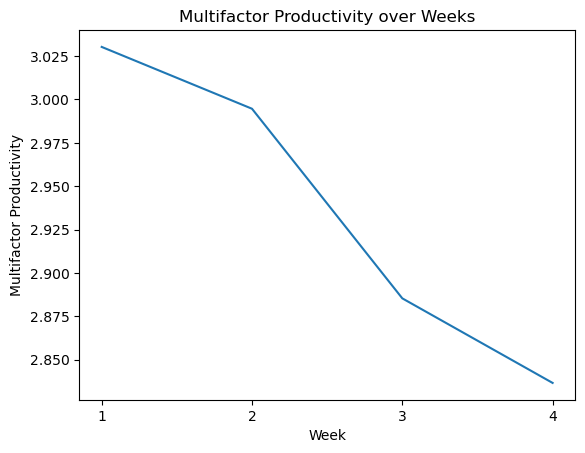

In [10]:
import matplotlib.pyplot as plt
# set weeks as x
# set multifactor as y
plt.plot(info.index, info['multifactor productivity'])
plt.xlabel('Week')
plt.xticks([1,2,3,4])
plt.ylabel('Multifactor Productivity')
plt.title('Multifactor Productivity over Weeks')
plt.show()